Extensive Analysis + Visualization with Python**


**Heart disease** or **Cardiovascular disease (CVD)** is a class of diseases that involve the heart or blood vessels. Cardiovascular diseases are the leading cause of death globally. This is true in all areas of the world except Africa. Together CVD resulted in 17.9 million deaths (32.1%) in 2015.  Deaths, at a given age, from CVD are more common and have been increasing in much of the developing world, while rates have declined in most of the developed world since the 1970s.

So, in this kernel, I have conducted **Exploratory Data Analysis** or **EDA** of the heart disease dataset. **Exploratory Data Analysis** or **EDA** is a critical first step in analyzing a new dataset. The primary objective of EDA is to analyze the data for distribution, outliers and anomalies in the dataset. It enable us to direct specific testing of the hypothesis. It includes analysing the data to find the distribution of data, its main characteristics, identifying patterns and visualizations.  It also provides tools for hypothesis generation by visualizing and understanding the data through graphical representation.  

I hope you learn and enjoy this kernel.

**So, your upvote would be highly appreciated.**

 Import libraries <a class="anchor" id="4"></a>


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline


sns.set(style="whitegrid")

In [3]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

I have imported the libraries. The next step is to import the datasets.

5. Import dataset <a class="anchor" id="5"></a>



In [5]:
df=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\New folder\heart.csv')

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
print('The shape of the dataset : ' ,df.shape)

The shape of the dataset :  (1025, 14)


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
df['target'].unique()

array([0, 1], dtype=int64)

In [14]:
df['target'].nunique()

2

In [15]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

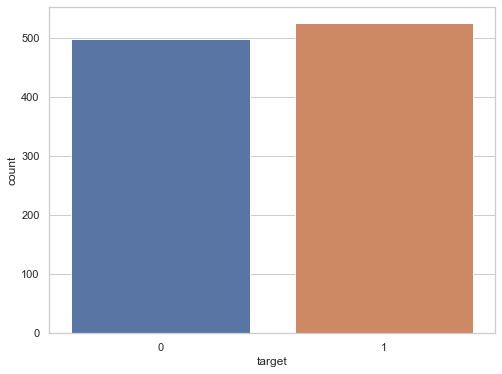

In [16]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target', data=df)
plt.show()

In [17]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1         226
     0          86
1    0         413
     1         300
Name: target, dtype: int64

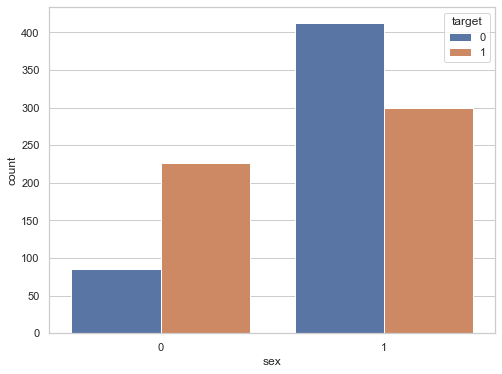

In [18]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='sex',hue='target', data=df)
plt.show()

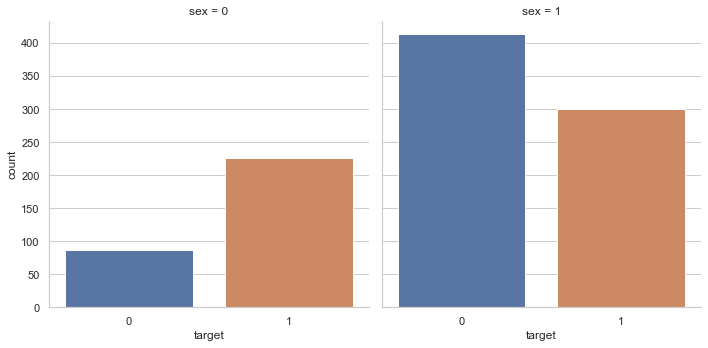

In [19]:
ax=sns.catplot(x='target' ,col='sex',data=df,kind='count',height=5,aspect=1)

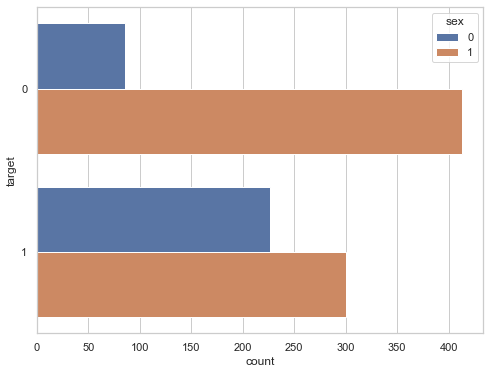

In [20]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(hue='sex',y='target', data=df)
plt.show()

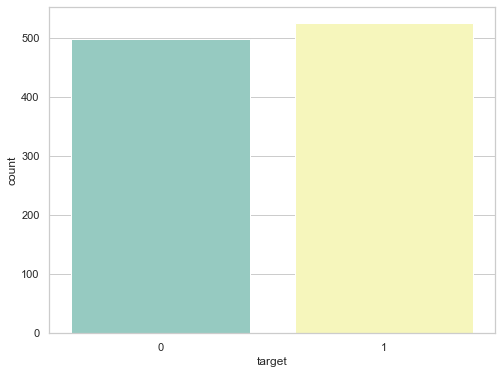

In [21]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',data=df,palette="Set3")
plt.show()

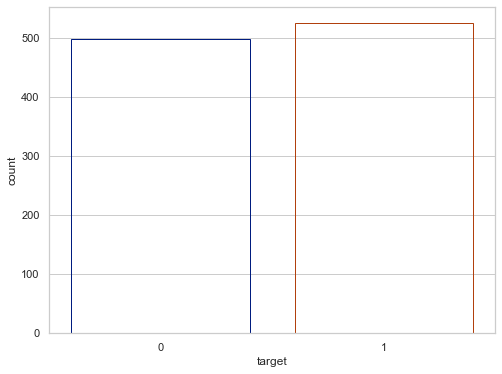

In [23]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target', data=df,facecolor=(0,0,0,0),edgecolor=sns.color_palette("dark",3))
plt.show()

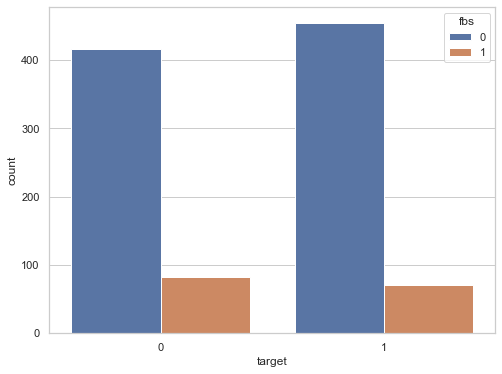

In [24]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',hue='fbs', data=df)
plt.show()

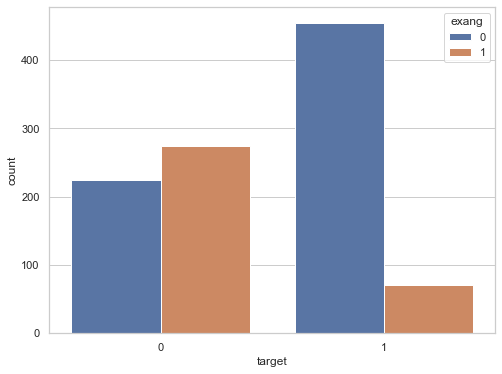

In [25]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',hue='exang', data=df)
plt.show()

In [27]:
correlation=df.corr()

In [28]:
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

In [29]:
df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [30]:
df['cp'].nunique()

4

In [31]:
df['cp'].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

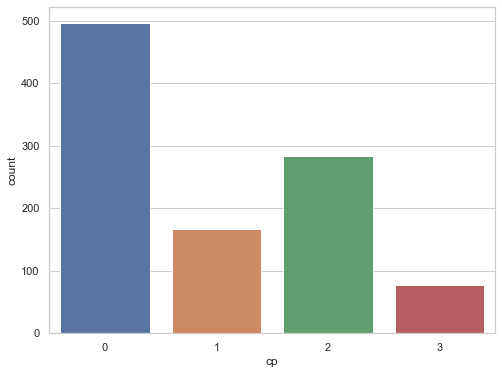

In [32]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='cp', data=df)
plt.show()

In [33]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         375
    1         122
1   1         134
    0          33
2   1         219
    0          65
3   1          51
    0          26
Name: target, dtype: int64

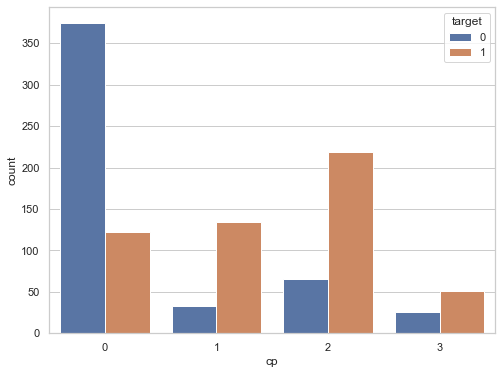

In [34]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='cp',hue='target', data=df)
plt.show()

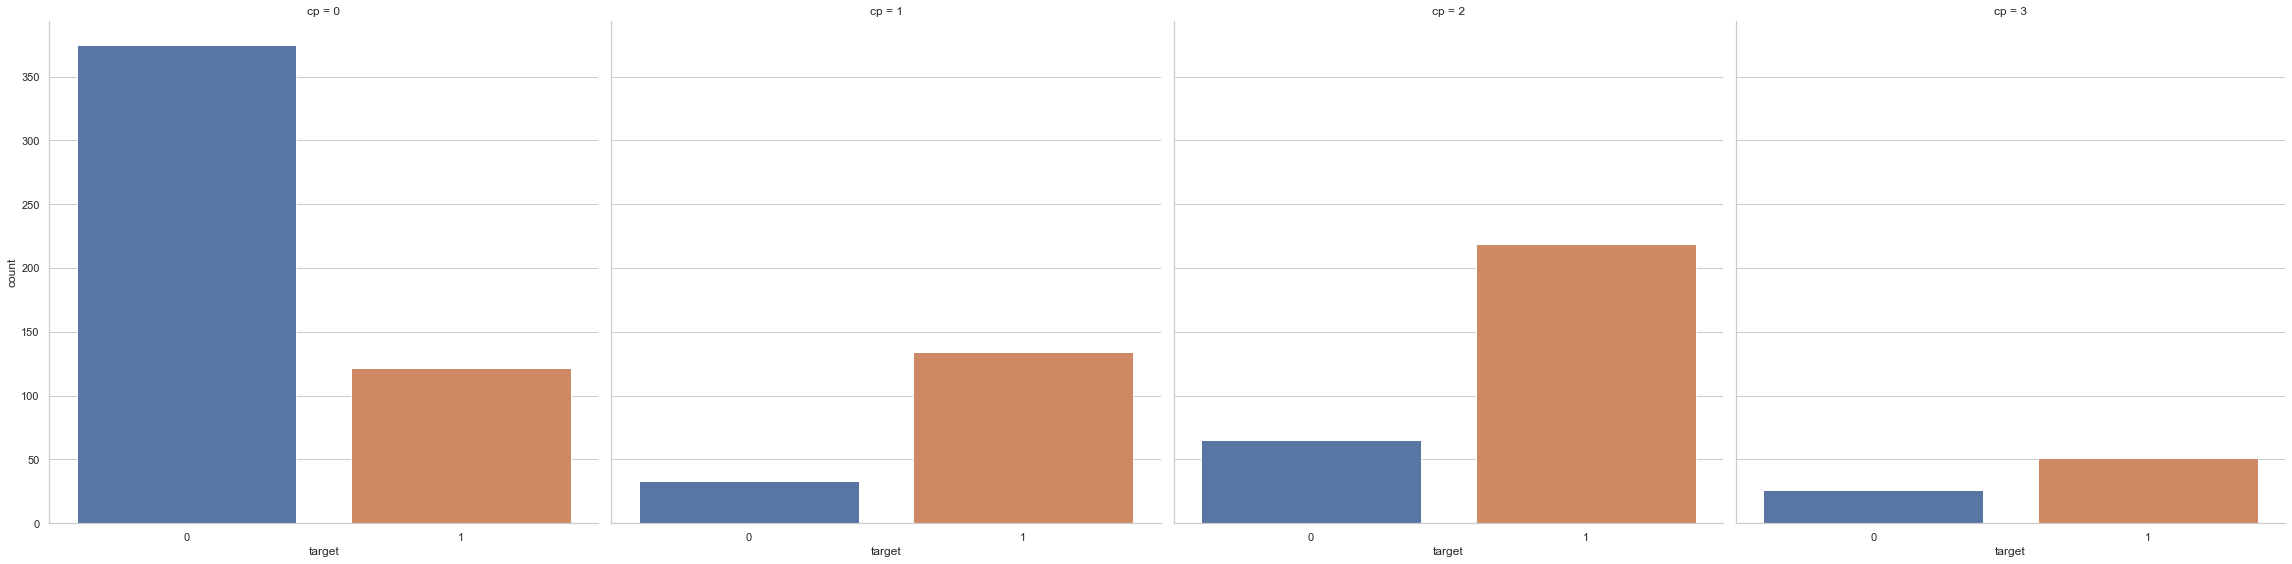

In [35]:
ax=sns.catplot(x='target',col='cp',data=df,kind='count',height=8,aspect=1)

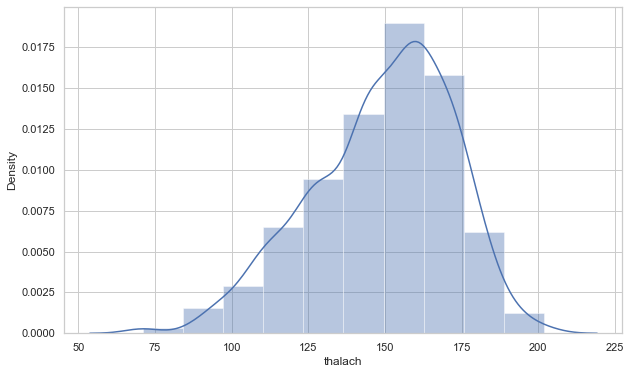

In [36]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
ax=sns.distplot(x,bins=10)
plt.show()

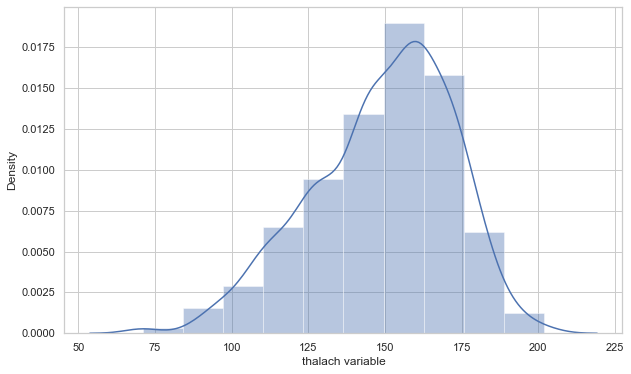

In [37]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax=sns.distplot(x,bins=10)
plt.show()

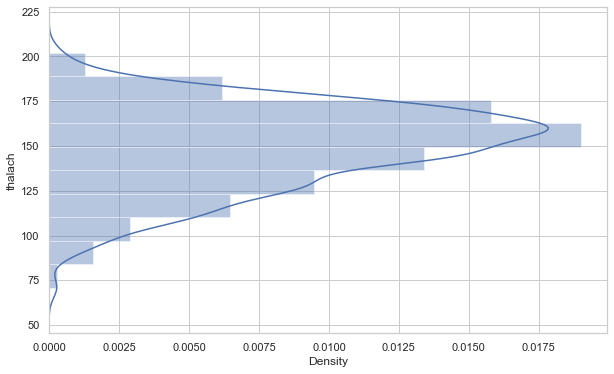

In [38]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
ax=sns.distplot(x,bins=10,vertical=True)
plt.show()

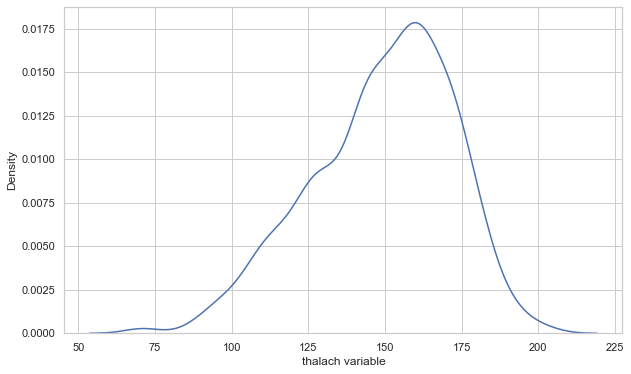

In [40]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax=sns.kdeplot(x)
plt.show()

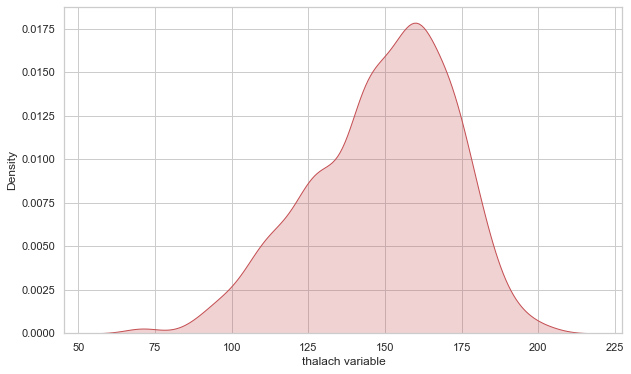

In [41]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax=sns.kdeplot(x,shade=True ,color='r')
plt.show()

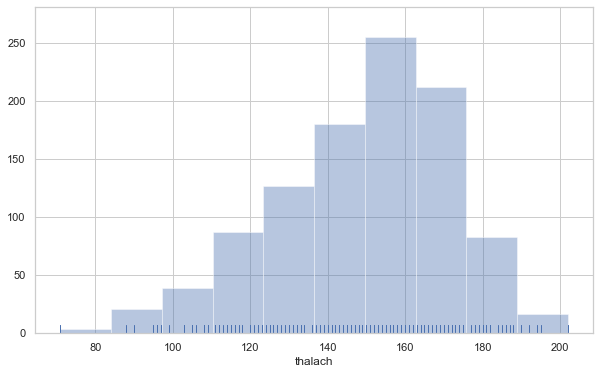

In [42]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=sns.distplot(x,kde=False,rug=True,bins=10)
plt.show()

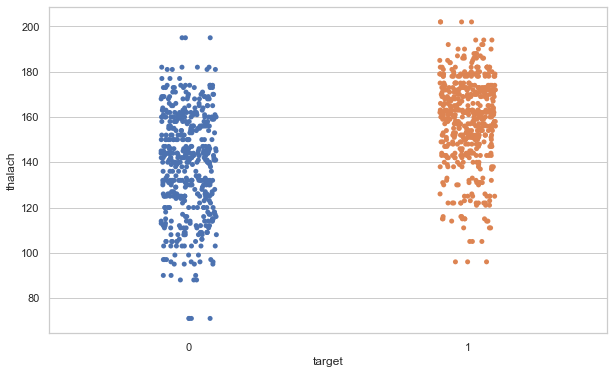

In [43]:
f,ax=plt.subplots(figsize=(10,6))
sns.stripplot(x='target',y='thalach',data=df)
plt.show()

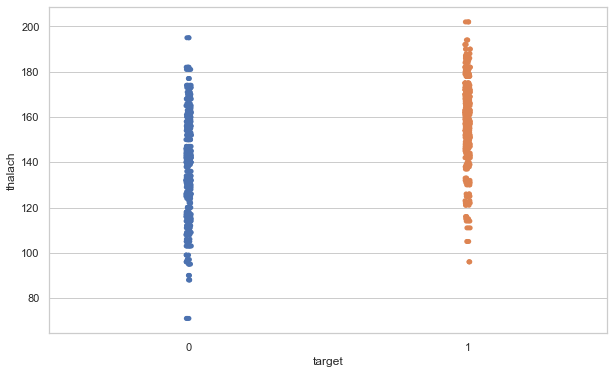

In [46]:
f,ax=plt.subplots(figsize=(10,6))
sns.stripplot(x='target',y='thalach',data=df,jitter=0.01)
plt.show()              

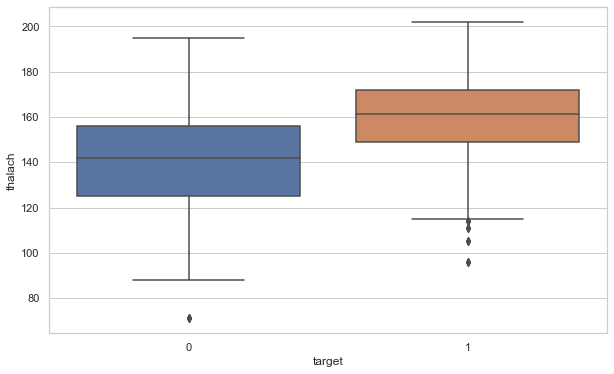

In [47]:
f,ax=plt.subplots(figsize=(10,6))
sns.boxplot(x='target',y='thalach',data=df)
plt.show()

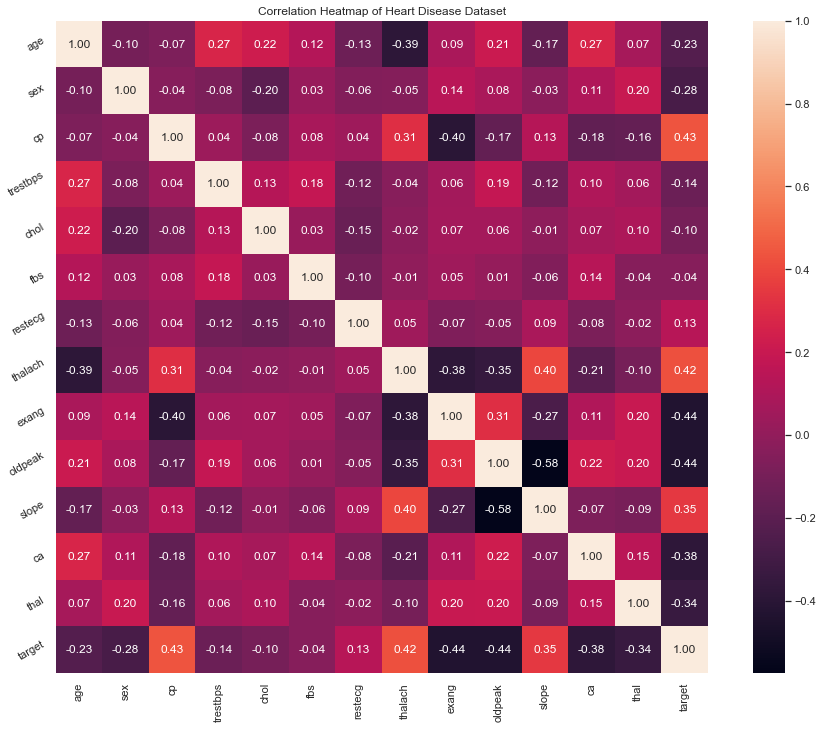

In [48]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a=sns.heatmap(correlation,square=True,annot=True,fmt='.2f',linecolor='white')
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)
plt.show()

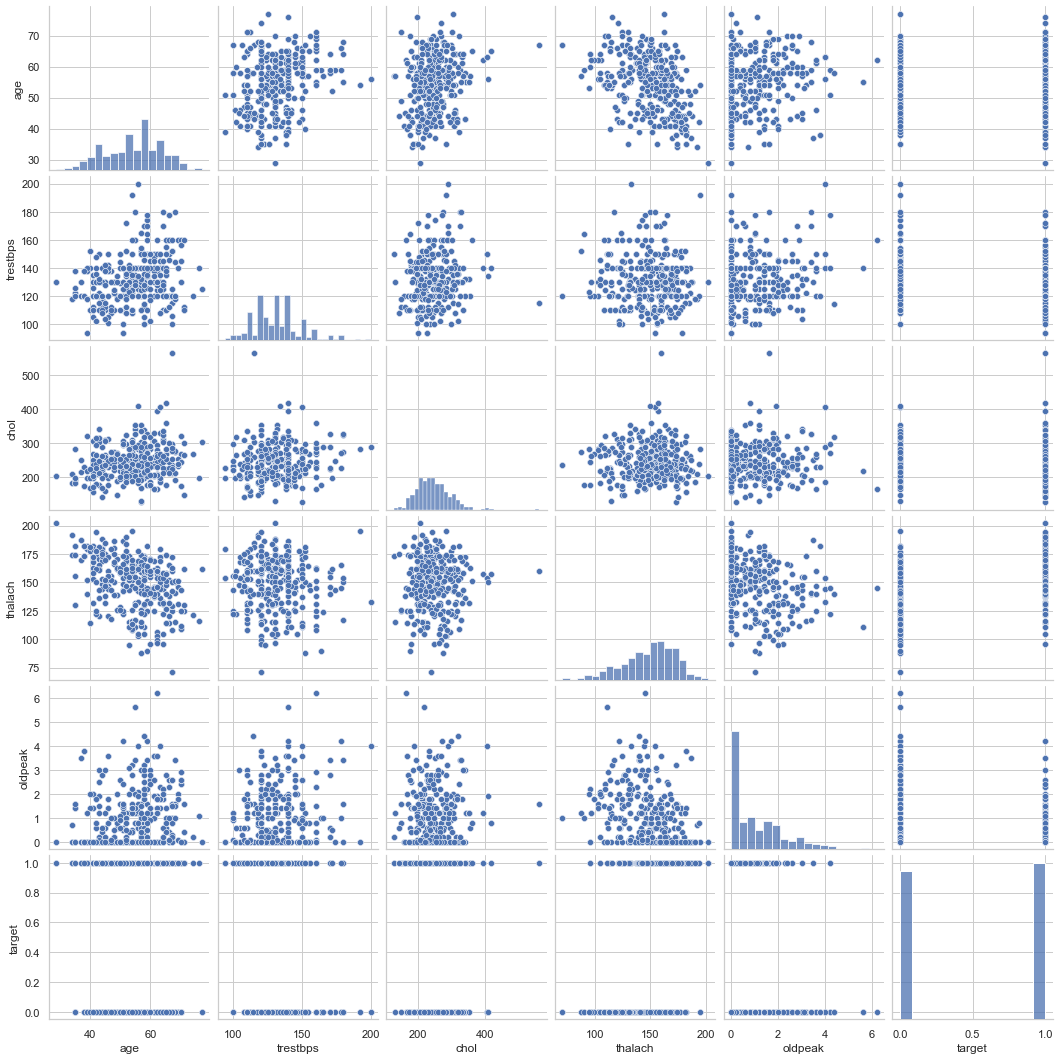

In [49]:
num_var=['age','trestbps','chol','thalach','oldpeak','target']
sns.pairplot(df[num_var],kind='scatter',diag_kind='hist')
plt.show()

In [51]:
df['age'].nunique()

41

In [52]:
df['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

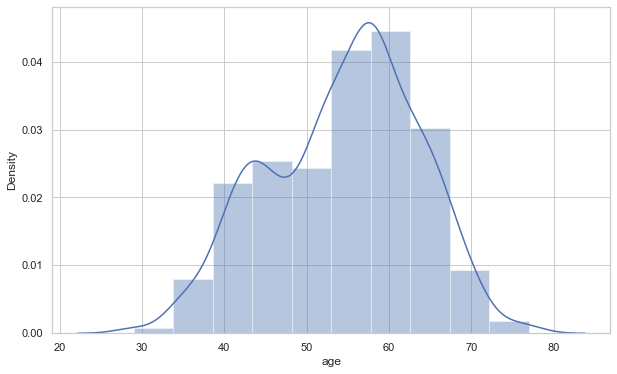

In [53]:
f,ax=plt.subplots(figsize=(10,6))
x=df['age']
ax=sns.distplot(x, bins=10)
plt.show()

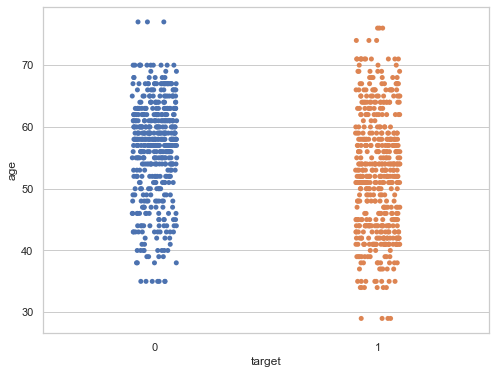

In [55]:
f,ax=plt.subplots(figsize=(8,6))
sns.stripplot(x='target',y='age',data=df)
plt.show()

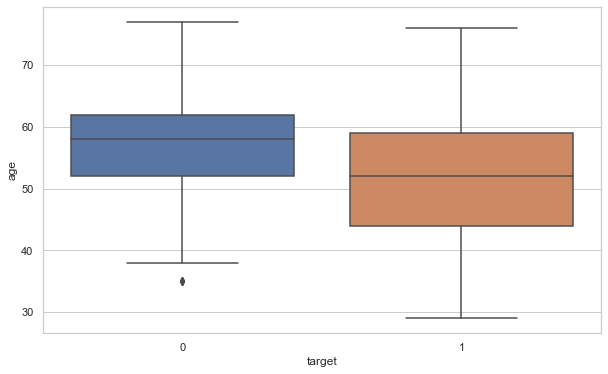

In [56]:
f,ax=plt.subplots(figsize=(10,6))
sns.boxplot(x='target',y='age',data=df)
plt.show()

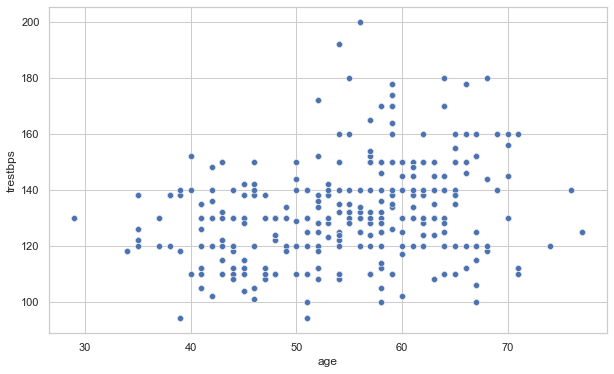

In [57]:
f,ax=plt.subplots(figsize=(10,6))
ax=sns.scatterplot(x='age',y='trestbps',data=df)
plt.show()

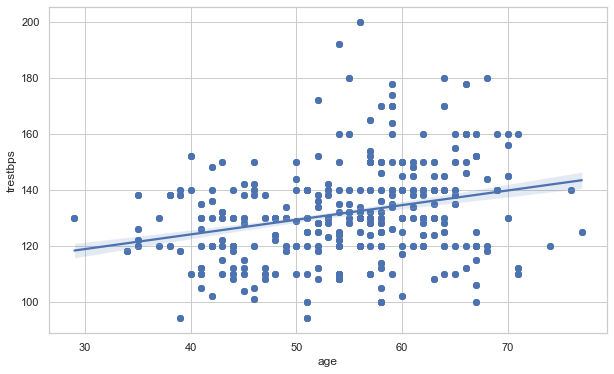

In [58]:
f,ax=plt.subplots(figsize=(10,6))
ax=sns.regplot(x='age',y='trestbps',data=df)
plt.show()

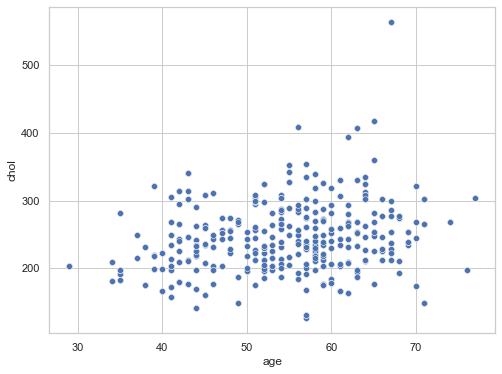

In [61]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.scatterplot(x='age',y='chol',data=df)
plt.show()

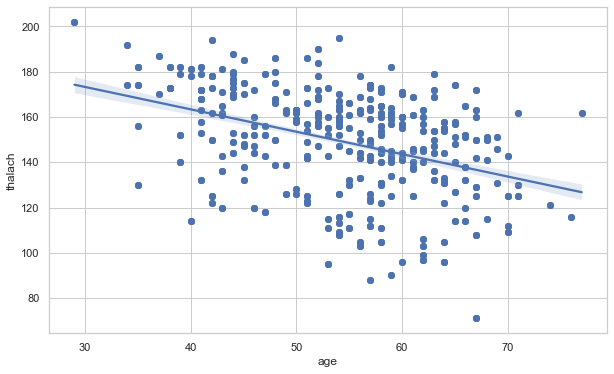

In [60]:
f,ax=plt.subplots(figsize=(10,6))
ax=sns.regplot(x='age',y='thalach',data=df)
plt.show()

In [62]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [63]:
assert pd.notnull(df).all().all()

In [64]:
assert(df>=0).all().all()

In [65]:
df['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

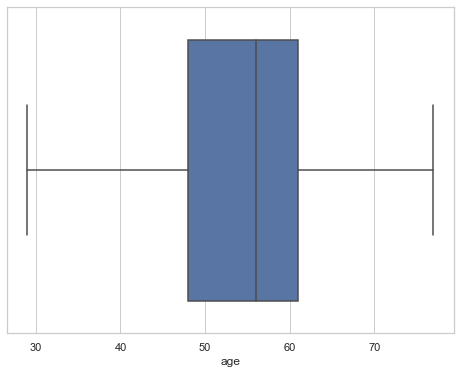

In [66]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=df['age'])
plt.show()

In [67]:
df['trestbps'].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

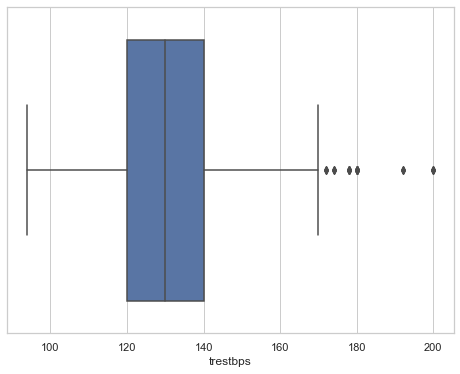

In [68]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=df['trestbps'])
plt.show()

In [69]:
df['chol'].describe()

count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64

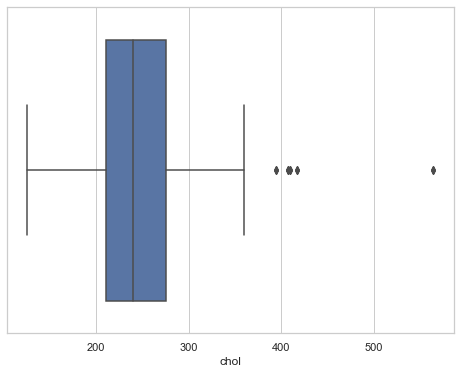

In [70]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=df['chol'])
plt.show()

In [72]:
df['thalach'].describe()

count    1025.000000
mean      149.114146
std        23.005724
min        71.000000
25%       132.000000
50%       152.000000
75%       166.000000
max       202.000000
Name: thalach, dtype: float64

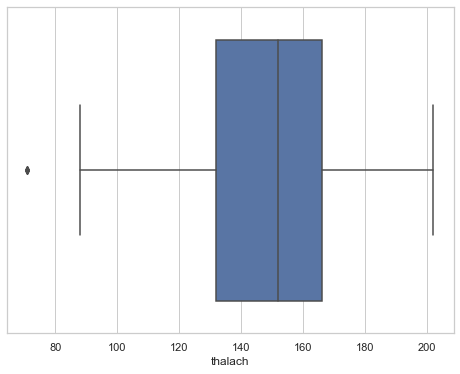

In [73]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=df['thalach'])
plt.show()

In [74]:
df['oldpeak'].describe()

count    1025.000000
mean        1.071512
std         1.175053
min         0.000000
25%         0.000000
50%         0.800000
75%         1.800000
max         6.200000
Name: oldpeak, dtype: float64

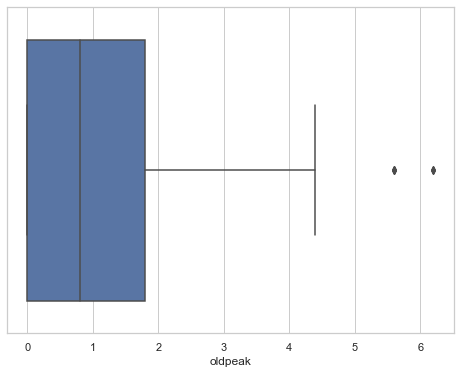

In [76]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=df['oldpeak'])
plt.show()